In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
tran=pd.read_csv("transactiondata.csv")
behv=pd.read_csv("purchasebehaviour.csv")
tran.shape, behv.shape

((264836, 8), (72637, 3))

In [3]:
tran.isnull().sum()

DATE              0
STORE_NBR         0
LYLTY_CARD_NBR    0
TXN_ID            0
PROD_NBR          0
PROD_NAME         0
PROD_QTY          0
TOT_SALES         0
dtype: int64

In [4]:
behv.isnull().sum()

LYLTY_CARD_NBR      0
LIFESTAGE           0
PREMIUM_CUSTOMER    0
dtype: int64

In [5]:
len(tran['LYLTY_CARD_NBR'].unique())


72637

In [6]:
len(behv['LYLTY_CARD_NBR'].unique())

72637

In [7]:
tran.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
0,43390,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0
1,43599,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3
2,43605,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9
3,43329,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0
4,43330,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8


In [8]:
tran.describe()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_QTY,TOT_SALES
count,264836.000000,264836.00000,2.648360e+05,2.648360e+05,264836.000000,264836.000000,264836.000000
mean,43464.036260,135.08011,1.355495e+05,1.351583e+05,56.583157,1.907309,7.304200
std,105.389282,76.78418,8.057998e+04,7.813303e+04,32.826638,0.643654,3.083226
min,43282.000000,1.00000,1.000000e+03,1.000000e+00,1.000000,1.000000,1.500000
25%,43373.000000,70.00000,7.002100e+04,6.760150e+04,28.000000,2.000000,5.400000
50%,43464.000000,130.00000,1.303575e+05,1.351375e+05,56.000000,2.000000,7.400000
75%,43555.000000,203.00000,2.030942e+05,2.027012e+05,85.000000,2.000000,9.200000
max,43646.000000,272.00000,2.373711e+06,2.415841e+06,114.000000,200.000000,650.000000


In [9]:
tran.dtypes

DATE                int64
STORE_NBR           int64
LYLTY_CARD_NBR      int64
TXN_ID              int64
PROD_NBR            int64
PROD_NAME          object
PROD_QTY            int64
TOT_SALES         float64
dtype: object

In [10]:
behv.head()

,LYLTY_CARD_NBR,LIFESTAGE,PREMIUM_CUSTOMER
0,1000,YOUNG SINGLES/COUPLES,Premium
1,1002,YOUNG SINGLES/COUPLES,Mainstream
2,1003,YOUNG FAMILIES,Budget
3,1004,OLDER SINGLES/COUPLES,Mainstream
4,1005,MIDAGE SINGLES/COUPLES,Mainstream


In [11]:
behv.describe()

,LYLTY_CARD_NBR
count,7.263700e+04
mean,1.361859e+05
std,8.989293e+04
min,1.000000e+03
25%,6.620200e+04
50%,1.340400e+05
75%,2.033750e+05
max,2.373711e+06


In [12]:
behv.dtypes

LYLTY_CARD_NBR       int64
LIFESTAGE           object
PREMIUM_CUSTOMER    object
dtype: object

In [13]:
tran['quantity'] = tran['PROD_NAME'].str[-4:-1]

In [14]:
tran.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,quantity
0,43390,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0,175
1,43599,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3,175
2,43605,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9,170
3,43329,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0,175
4,43330,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8,150


In [15]:
tran.loc[tran['PROD_QTY']==200,:]

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,quantity
69762,43331,226,226000,226201,4,Dorito Corn Chp Supreme 380g,200,650.0,380
69763,43605,226,226000,226210,4,Dorito Corn Chp Supreme 380g,200,650.0,380


In [16]:
tran.loc[tran['LYLTY_CARD_NBR']==226000,:]

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,quantity
69762,43331,226,226000,226201,4,Dorito Corn Chp Supreme 380g,200,650.0,380
69763,43605,226,226000,226210,4,Dorito Corn Chp Supreme 380g,200,650.0,380


In [17]:
#200 seems to be an obvious outlier
tran=tran.drop(tran.index[tran['PROD_QTY']==200])

In [18]:
from datetime import datetime
from datetime import timedelta

In [19]:
def change_date(date):
    pivot= datetime(1900,1,1)
    if date<60:
        diff=timedelta(days=(date-1))
    else:
        diff=timedelta(days=(date-2))
    new_date=diff+pivot
    return new_date
    

In [20]:
tran['DATE']=tran['DATE'].apply(change_date)

In [21]:
tran.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,quantity
0,2018-10-17,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0,175
1,2019-05-14,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3,175
2,2019-05-20,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9,170
3,2018-08-17,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0,175
4,2018-08-18,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8,150


In [22]:
tran['brand']=tran['PROD_NAME'].str.split(' ').str[0]

In [23]:
tran.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,quantity,brand
0,2018-10-17,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0,175,Natural
1,2019-05-14,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3,175,CCs
2,2019-05-20,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9,170,Smiths
3,2018-08-17,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0,175,Smiths
4,2018-08-18,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8,150,Kettle


In [24]:
tran['STORE_NBR'].value_counts()

226    2020
88     1873
93     1832
165    1819
237    1785
       ... 
11        2
31        2
206       2
76        1
92        1
Name: STORE_NBR, Length: 272, dtype: int64

In [25]:
tran['PROD_NBR'].value_counts()

102    3304
108    3296
33     3269
112    3268
75     3265
       ... 
11     1431
76     1430
98     1419
29     1418
72     1410
Name: PROD_NBR, Length: 114, dtype: int64

In [26]:
tran['PROD_QTY'].value_counts()

2    236039
1     27518
5       450
3       430
4       397
Name: PROD_QTY, dtype: int64

In [27]:
tran['quantity'].value_counts()

175    66390
150    43131
134    25102
110    22387
170    19983
165    15297
300    15166
330    12540
380     6416
270     6285
210     6272
200     4473
Sal     3257
250     3169
 90     3008
190     2995
160     2970
220     1564
 70     1507
180     1468
125     1454
Name: quantity, dtype: int64

In [28]:
tran.loc[tran['quantity']=='Sal']

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,quantity,brand
65,2019-05-20,83,83008,82099,63,Kettle 135g Swt Pot Sea Salt,2,8.4,Sal,Kettle
153,2019-05-17,208,208139,206906,63,Kettle 135g Swt Pot Sea Salt,1,4.2,Sal,Kettle
174,2018-08-20,237,237227,241132,63,Kettle 135g Swt Pot Sea Salt,2,8.4,Sal,Kettle
177,2019-05-17,243,243070,246706,63,Kettle 135g Swt Pot Sea Salt,1,4.2,Sal,Kettle
348,2018-10-26,7,7077,6604,63,Kettle 135g Swt Pot Sea Salt,2,8.4,Sal,Kettle
...,...,...,...,...,...,...,...,...,...,...
264564,2018-10-08,260,260240,259480,63,Kettle 135g Swt Pot Sea Salt,2,8.4,Sal,Kettle
264574,2019-06-12,261,261035,259860,63,Kettle 135g Swt Pot Sea Salt,2,8.4,Sal,Kettle
264725,2018-07-20,266,266413,264246,63,Kettle 135g Swt Pot Sea Salt,1,4.2,Sal,Kettle
264767,2019-06-08,269,269133,265839,63,Kettle 135g Swt Pot Sea Salt,2,8.4,Sal,Kettle


In [29]:
tran['quantity']=tran['quantity'].replace('Sal',135)

In [30]:
tran['brand'].value_counts()

Kettle        41288
Smiths        28860
Pringles      25102
Doritos       24962
Thins         14075
RRD           11894
Infuzions     11057
WW            10320
Cobs           9693
Tostitos       9471
Twisties       9454
Old            9324
Tyrrells       6442
Grain          6272
Natural        6050
Red            5885
Cheezels       4603
CCs            4551
Woolworths     4437
Dorito         3183
Infzns         3144
Smith          2963
Cheetos        2927
Snbts          1576
Burger         1564
GrnWves        1468
Sunbites       1432
NCC            1419
French         1418
Name: brand, dtype: int64

In [31]:
tran.loc[tran['PROD_NAME'].str.split(' ').str[0]=='Old']

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,quantity,brand
5,2019-05-19,4,4074,2982,57,Old El Paso Salsa Dip Tomato Mild 300g,1,5.1,300,Old
25,2019-05-15,39,39144,35506,57,Old El Paso Salsa Dip Tomato Mild 300g,1,5.1,300,Old
71,2018-08-15,94,94233,93956,65,Old El Paso Salsa Dip Chnky Tom Ht300g,1,5.1,300,Old
87,2018-08-15,116,116184,120270,59,Old El Paso Salsa Dip Tomato Med 300g,1,5.1,300,Old
114,2018-08-16,157,157185,159562,59,Old El Paso Salsa Dip Tomato Med 300g,2,10.2,300,Old
...,...,...,...,...,...,...,...,...,...,...
264594,2019-03-15,261,261323,261068,65,Old El Paso Salsa Dip Chnky Tom Ht300g,2,10.2,300,Old
264607,2018-11-07,262,262061,261665,65,Old El Paso Salsa Dip Chnky Tom Ht300g,2,10.2,300,Old
264615,2018-08-23,262,262084,261793,57,Old El Paso Salsa Dip Tomato Mild 300g,2,10.2,300,Old
264628,2019-01-01,264,264165,262926,65,Old El Paso Salsa Dip Chnky Tom Ht300g,2,10.2,300,Old


In [32]:
tran['brand']=tran['brand'].replace('Old','Old El Paso')

In [33]:
tran.loc[tran['PROD_NAME'].str.split(' ').str[0]=='Red']

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,quantity,brand
28,2018-08-15,41,41486,38472,13,Red Rock Deli Thai Chilli&Lime 150g,1,2.7,150,Red
32,2019-05-20,45,45127,41122,64,Red Rock Deli SR Salsa & Mzzrlla 150g,2,5.4,150,Red
34,2018-08-16,51,51100,46802,48,Red Rock Deli Sp Salt & Truffle 150G,1,2.7,150,Red
189,2018-08-19,257,257168,256776,64,Red Rock Deli SR Salsa & Mzzrlla 150g,2,5.4,150,Red
212,2019-03-13,1,1348,391,48,Red Rock Deli Sp Salt & Truffle 150G,1,2.7,150,Red
...,...,...,...,...,...,...,...,...,...,...
264733,2019-05-11,266,266432,264264,48,Red Rock Deli Sp Salt & Truffle 150G,1,2.7,150,Red
264749,2018-12-14,268,268270,264689,13,Red Rock Deli Thai Chilli&Lime 150g,1,2.7,150,Red
264775,2018-12-01,269,269204,266270,58,Red Rock Deli Chikn&Garlic Aioli 150g,2,5.4,150,Red
264780,2019-01-10,269,269222,266382,64,Red Rock Deli SR Salsa & Mzzrlla 150g,2,5.4,150,Red


In [34]:
tran['brand']=tran['brand'].replace('Red','Red Rock Deli')

In [35]:
tran['brand']=tran['brand'].replace('Grain','Grain Waves')

In [36]:
tran['brand']=tran['brand'].replace({'Smith':'Smiths','Dorito':'Doritos','Infzns':'Infuzions','Snbts':'Sunbites','GrnWves':'Grain Waves','RRD':'Red Rock Deli','WW':'Woolworths'})

In [37]:
tran['brand'].value_counts()

Kettle           41288
Smiths           31823
Doritos          28145
Pringles         25102
Red Rock Deli    17779
Woolworths       14757
Infuzions        14201
Thins            14075
Cobs              9693
Tostitos          9471
Twisties          9454
Old El Paso       9324
Grain Waves       7740
Tyrrells          6442
Natural           6050
Cheezels          4603
CCs               4551
Sunbites          3008
Cheetos           2927
Burger            1564
NCC               1419
French            1418
Name: brand, dtype: int64

In [38]:
tran['brand']=tran['brand'].replace({'Natural':'NCC'})

In [39]:
tran.pivot_table(values='TOT_SALES',index='PROD_QTY',aggfunc='mean')

,TOT_SALES
PROD_QTY,
1,3.714659
2,7.675745
3,11.535000
4,15.054408
5,18.184778


In [40]:
#graphs

In [41]:
import seaborn as sns

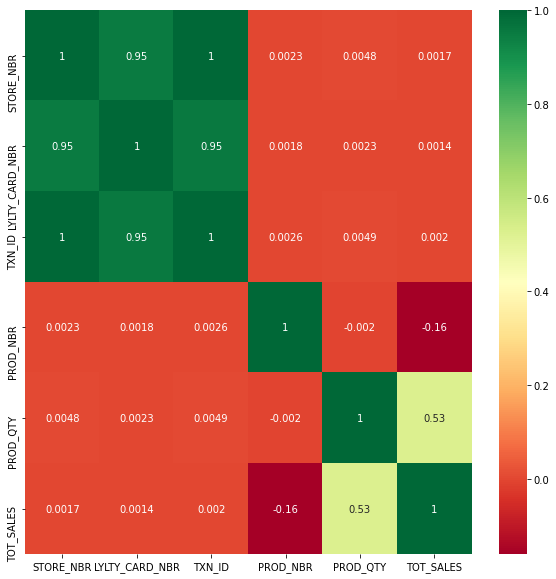

In [42]:
corrmat= tran.corr()
top_features= corrmat.index
plt.figure(figsize=(10,10))
#plot heatmap
g=sns.heatmap(tran[top_features].corr(),annot=True,cmap="RdYlGn")

In [43]:
tran.corr()

,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_QTY,TOT_SALES
STORE_NBR,1.000000,0.950868,0.997593,0.002324,0.004766,0.001672
LYLTY_CARD_NBR,0.950868,1.000000,0.954919,0.001769,0.002296,0.001392
TXN_ID,0.997593,0.954919,1.000000,0.002558,0.004937,0.001994
PROD_NBR,0.002324,0.001769,0.002558,1.000000,-0.002043,-0.160224
PROD_QTY,0.004766,0.002296,0.004937,-0.002043,1.000000,0.527788
TOT_SALES,0.001672,0.001392,0.001994,-0.160224,0.527788,1.000000


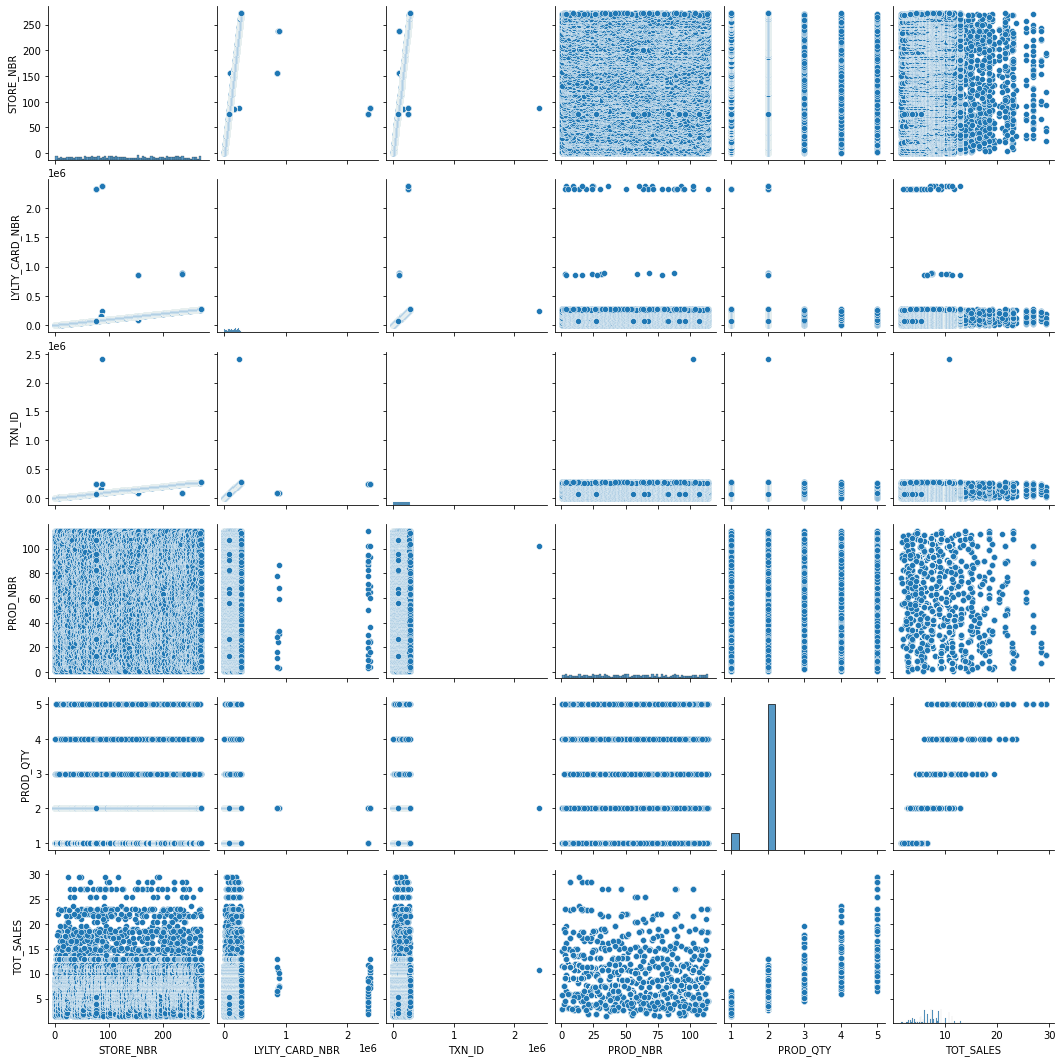

In [44]:
sns.pairplot(tran)

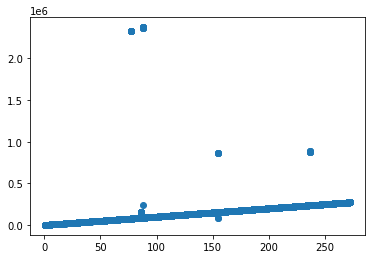

In [45]:
plt.scatter(tran['STORE_NBR'],tran['LYLTY_CARD_NBR'])

In [46]:
tran.dtypes

DATE              datetime64[ns]
STORE_NBR                  int64
LYLTY_CARD_NBR             int64
TXN_ID                     int64
PROD_NBR                   int64
PROD_NAME                 object
PROD_QTY                   int64
TOT_SALES                float64
quantity                  object
brand                     object
dtype: object

In [47]:
tran=tran.astype({'quantity':'int64'})

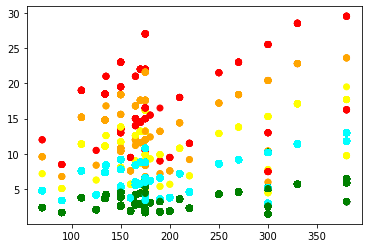

In [48]:
fig,ax=plt.subplots()
colors={5:'red',4:'orange',3:'yellow',2:'cyan',1:'green'}
ax.scatter(tran['quantity'],tran['TOT_SALES'],c=tran['PROD_QTY'].apply(lambda x:colors[x]))
plt.show()

In [49]:
tran['PROD_NAME'] = tran['PROD_NAME'].apply(lambda x: x.lower())
tran = tran[~tran['PROD_NAME'].str.contains("salsa")]


In [50]:
tran.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,quantity,brand
0,2018-10-17,1,1000,1,5,natural chip compny seasalt175g,2,6.0,175,NCC
1,2019-05-14,1,1307,348,66,ccs nacho cheese 175g,3,6.3,175,CCs
2,2019-05-20,1,1343,383,61,smiths crinkle cut chips chicken 170g,2,2.9,170,Smiths
3,2018-08-17,2,2373,974,69,smiths chip thinly s/cream&onion 175g,5,15.0,175,Smiths
4,2018-08-18,2,2426,1038,108,kettle tortilla chpshny&jlpno chili 150g,3,13.8,150,Kettle


In [51]:
from matplotlib.dates import DateFormatter

In [52]:
pd.date_range(start = '2018-07-01', end = '2019-06-30').difference(tran['DATE'])

DatetimeIndex(['2018-12-25'], dtype='datetime64[ns]', freq=None)

In [53]:
a = pd.pivot_table(tran, values = 'TOT_SALES', index = 'DATE', aggfunc = 'sum')
a.head()

,TOT_SALES
DATE,
2018-07-01,4920.1
2018-07-02,4877.0
2018-07-03,4954.7
2018-07-04,4968.1
2018-07-05,4682.0


In [54]:
b = pd.DataFrame(index = pd.date_range(start = '2018-07-01', end = '2019-06-30'))
b['TOT_SALES'] = 0
len(b)

365

In [55]:
c = a + b
c.fillna(0, inplace = True)

In [56]:
c.index.name = 'Date'
c.rename(columns = {'TOT_SALES': 'Total Sales'}, inplace = True)
c.head()

,Total Sales
Date,
2018-07-01,4920.1
2018-07-02,4877.0
2018-07-03,4954.7
2018-07-04,4968.1
2018-07-05,4682.0


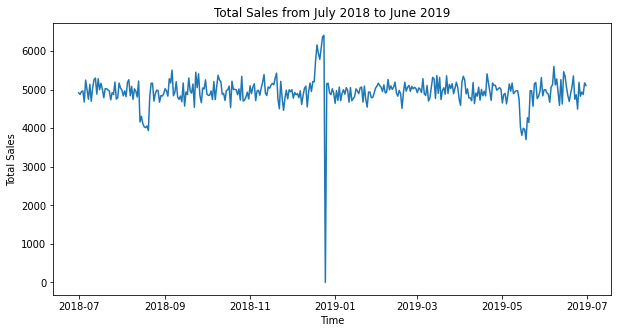

In [57]:
timeline = c.index
graph = c['Total Sales']

fig, ax = plt.subplots(figsize = (10, 5))
ax.plot(timeline, graph)

date_form = DateFormatter("%Y-%m")
ax.xaxis.set_major_formatter(date_form)
plt.title('Total Sales from July 2018 to June 2019')
plt.xlabel('Time')
plt.ylabel('Total Sales')

plt.show()

In [58]:
c[c['Total Sales'] == 0]

,Total Sales
Date,
2018-12-25,0.0


In [59]:
c_december = c[(c.index < "2019-01-01") & (c.index > "2018-11-30")]
c_december.head()

,Total Sales
Date,
2018-12-01,5000.9
2018-12-02,4781.1
2018-12-03,4927.0
2018-12-04,4869.4
2018-12-05,4900.5


Text(0.5, 1.0, 'Total Sales in December')

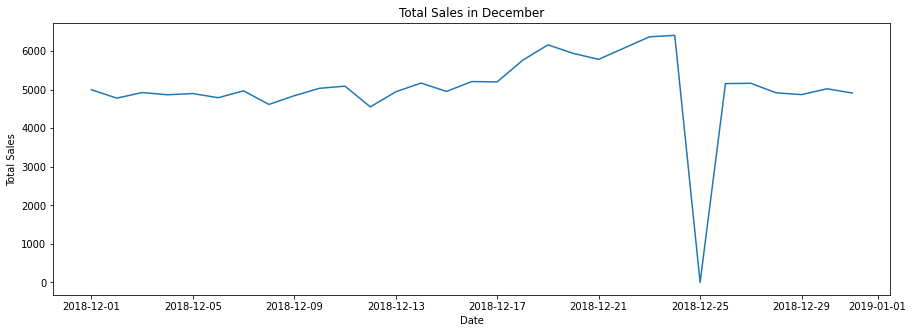

In [60]:
plt.figure(figsize = (15, 5))
plt.plot(c_december)
plt.xlabel('Date')
plt.ylabel('Total Sales')
plt.title('Total Sales in December')

In [61]:
c_aug = c[(c.index < "2018-09-01") & (c.index > "2018-08-01")]
c_aug.head()

,Total Sales
Date,
2018-08-02,4842.5
2018-08-03,4969.8
2018-08-04,4823.1
2018-08-05,5191.9
2018-08-06,5259.6


Text(0.5, 1.0, 'Total Sales in august')

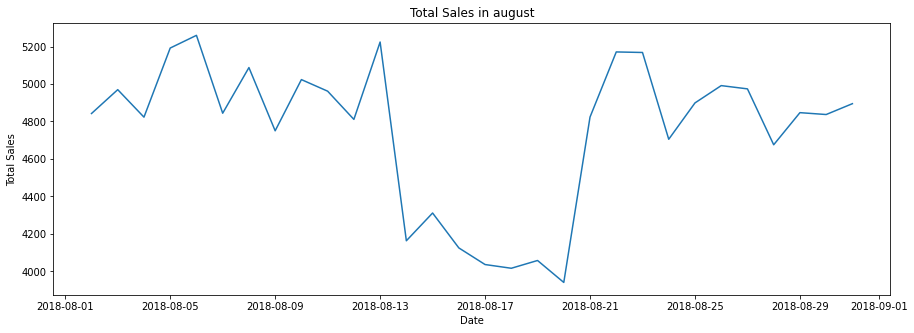

In [62]:
plt.figure(figsize = (15, 5))
plt.plot(c_aug)
plt.xlabel('Date')
plt.ylabel('Total Sales')
plt.title('Total Sales in august')

In [63]:
c_may = c[(c.index < "2019-06-01") & (c.index > "2019-05-01")]
c_may.head()

,Total Sales
Date,
2019-05-02,4877.1
2019-05-03,4904.8
2019-05-04,4633.0
2019-05-05,4881.1
2019-05-06,5150.0


Text(0.5, 1.0, 'Total Sales in may 2019')

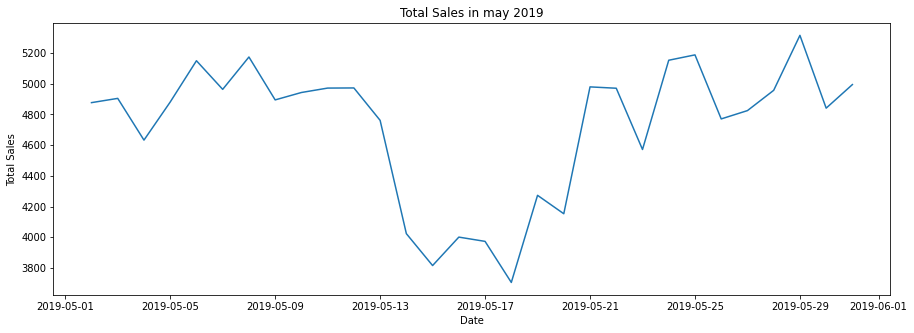

In [64]:
plt.figure(figsize = (15, 5))
plt.plot(c_may)
plt.xlabel('Date')
plt.ylabel('Total Sales')
plt.title('Total Sales in may 2019')

In [65]:
a_quant = pd.pivot_table(tran, values = 'TOT_SALES', index = 'quantity', aggfunc = 'sum')
a_quant.head()

,TOT_SALES
quantity,
70,6852.0
90,9676.4
110,162765.4
125,5733.0
134,177655.5


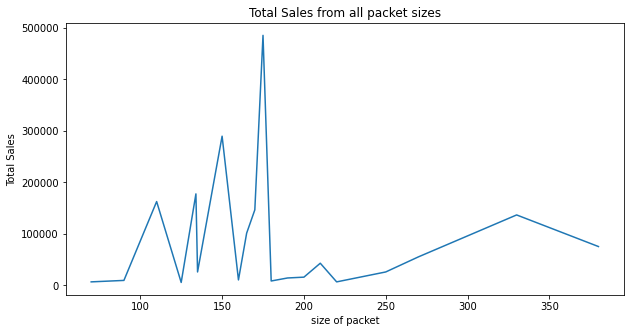

In [66]:
fig, ax = plt.subplots(figsize = (10, 5))
ax.plot(a_quant.index,a_quant['TOT_SALES'])
plt.title('Total Sales from all packet sizes')
plt.xlabel('size of packet')
plt.ylabel('Total Sales')
plt.show()

In [67]:
a_index= a_quant[(a_quant.index>150) & (a_quant.index <200)]

In [68]:
a_index

,TOT_SALES
quantity,
160,10647.6
165,101360.6
170,146673.0
175,485437.4
180,8568.4
190,14412.9


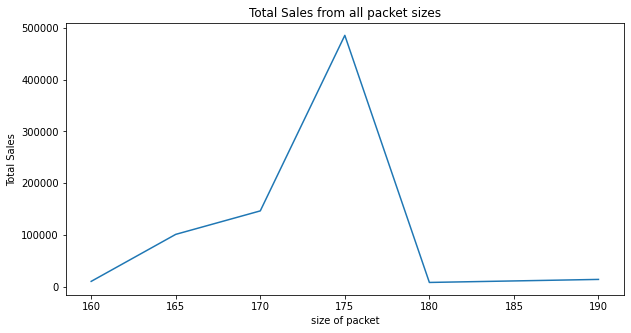

In [69]:
fig, ax = plt.subplots(figsize = (10, 5))
ax.plot(a_index.index,a_index['TOT_SALES'])
plt.title('Total Sales from all packet sizes')
plt.xlabel('size of packet')
plt.ylabel('Total Sales')
plt.show()

Text(0.5, 1.0, 'Pack Size Histogram')

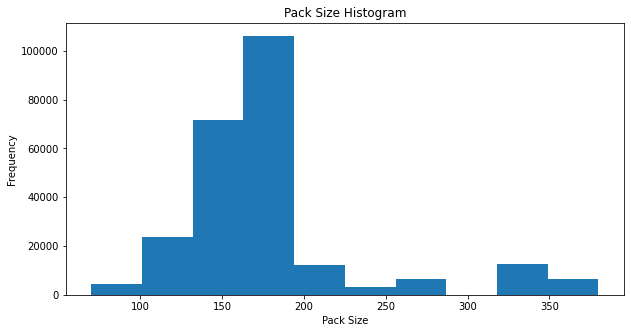

In [70]:
plt.figure(figsize = (10, 5))
plt.hist(tran['quantity'])     
plt.xlabel('Pack Size')
plt.ylabel('Frequency')
plt.title('Pack Size Histogram')

In [71]:
brands = pd.pivot_table(tran, values = 'TOT_SALES', index = 'brand', aggfunc = 'sum')
brands.head()

,TOT_SALES
brand,
Burger,6831.0
CCs,18078.9
Cheetos,16884.5
Cheezels,40029.9
Cobs,70569.8


In [72]:
brands['brand'] = brands.index

<AxesSubplot:xlabel='brand', ylabel='TOT_SALES'>

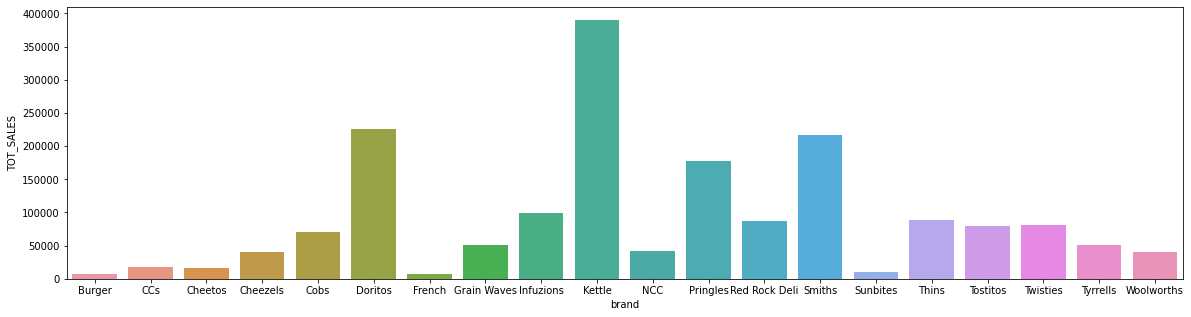

In [73]:
plt.figure(figsize = (20,5))
sns.barplot(x = 'brand', y ='TOT_SALES', data = brands)

In [74]:
stores = pd.pivot_table(tran, values = 'TOT_SALES', index = 'STORE_NBR', aggfunc = 'sum')
stores.head()

,TOT_SALES
STORE_NBR,
1,2223.90
2,1854.00
3,12149.65
4,13709.25
5,8802.20


In [75]:
stores['STORE_NBR'] = stores.index

<AxesSubplot:xlabel='STORE_NBR', ylabel='TOT_SALES'>

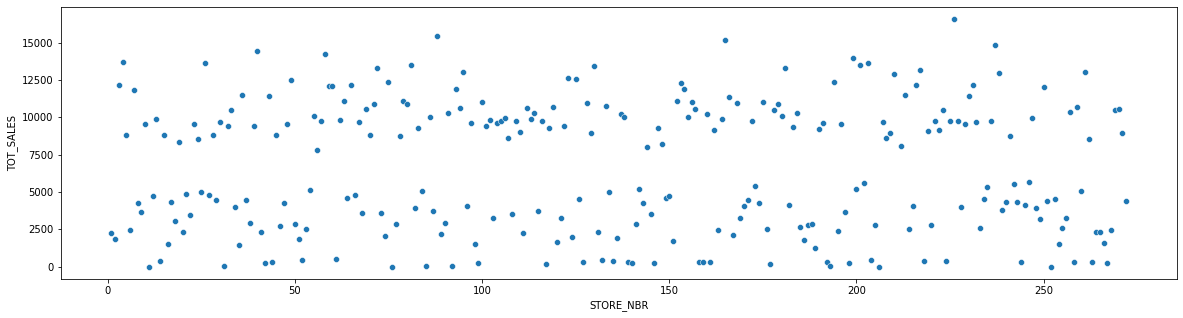

In [76]:
plt.figure(figsize = (20,5))
sns.scatterplot(x = 'STORE_NBR', y ='TOT_SALES', data = stores)

In [77]:
#BEHV

In [78]:
behv.head()

,LYLTY_CARD_NBR,LIFESTAGE,PREMIUM_CUSTOMER
0,1000,YOUNG SINGLES/COUPLES,Premium
1,1002,YOUNG SINGLES/COUPLES,Mainstream
2,1003,YOUNG FAMILIES,Budget
3,1004,OLDER SINGLES/COUPLES,Mainstream
4,1005,MIDAGE SINGLES/COUPLES,Mainstream


In [79]:
behv.dtypes

LYLTY_CARD_NBR       int64
LIFESTAGE           object
PREMIUM_CUSTOMER    object
dtype: object

In [80]:
behv.isnull().sum()

LYLTY_CARD_NBR      0
LIFESTAGE           0
PREMIUM_CUSTOMER    0
dtype: int64

In [81]:
behv['LIFESTAGE'].value_counts()

RETIREES                  14805
OLDER SINGLES/COUPLES     14609
YOUNG SINGLES/COUPLES     14441
OLDER FAMILIES             9780
YOUNG FAMILIES             9178
MIDAGE SINGLES/COUPLES     7275
NEW FAMILIES               2549
Name: LIFESTAGE, dtype: int64

<AxesSubplot:xlabel='count', ylabel='LIFESTAGE'>

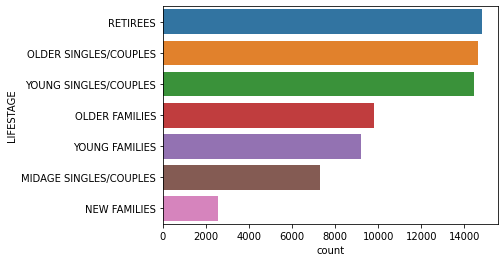

In [82]:
sns.countplot(y = behv['LIFESTAGE'], order = behv['LIFESTAGE'].value_counts().index)

In [83]:
behv['PREMIUM_CUSTOMER'].value_counts()

Mainstream    29245
Budget        24470
Premium       18922
Name: PREMIUM_CUSTOMER, dtype: int64

<AxesSubplot:xlabel='count', ylabel='PREMIUM_CUSTOMER'>

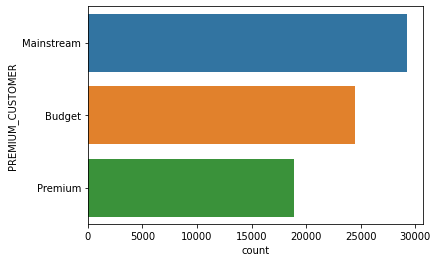

In [84]:
sns.countplot(y = behv['PREMIUM_CUSTOMER'], order = behv['PREMIUM_CUSTOMER'].value_counts().index)

In [85]:
#MERGE

In [86]:
df = pd.merge(tran,behv)

In [87]:
df.shape , tran.shape, behv.shape


((246740, 12), (246740, 10), (72637, 3))

In [88]:
sales= pd.pivot_table(df, values = 'TOT_SALES', index = 'PREMIUM_CUSTOMER', aggfunc = 'sum')
sales.head()

,TOT_SALES
PREMIUM_CUSTOMER,
Budget,631406.85
Mainstream,700865.40
Premium,472905.45


In [89]:
sales_1= pd.pivot_table(df, values = 'TOT_SALES', index = 'LIFESTAGE', aggfunc = 'sum')
sales_1.head()

,TOT_SALES
LIFESTAGE,
MIDAGE SINGLES/COUPLES,172523.80
NEW FAMILIES,47347.95
OLDER FAMILIES,328519.90
OLDER SINGLES/COUPLES,376019.65
RETIREES,342381.90


In [90]:
table = pd.pivot_table(df, values='TOT_SALES', index=['LIFESTAGE', 'PREMIUM_CUSTOMER'], aggfunc='sum')

In [91]:
table

TOT_SALES
LIFESTAGE              PREMIUM_CUSTOMER           
MIDAGE SINGLES/COUPLES Budget             33345.70
                       Mainstream         84734.25
                       Premium            54443.85
NEW FAMILIES           Budget             20607.45
                       Mainstream         15979.70
                       Premium            10760.80
OLDER FAMILIES         Budget            156863.75
                       Mainstream         96413.55
                       Premium            75242.60
OLDER SINGLES/COUPLES  Budget            127833.60
                       Mainstream        124648.50
                       Premium           123537.55
RETIREES               Budget            105916.30
                       Mainstream        145168.95
                       Premium            91296.65
YOUNG FAMILIES         Budget            129717.95
                       Mainstream         86338.25
                       Premium            78571.70
YOUNG SINGLES/COUPLES  Budget             57122.10
                       Mainstream        147582.20
                       Premium            39052.30

In [92]:
table.sort_values(by = 'TOT_SALES', ascending = False, inplace = True)

In [93]:
table

TOT_SALES
LIFESTAGE              PREMIUM_CUSTOMER           
OLDER FAMILIES         Budget            156863.75
YOUNG SINGLES/COUPLES  Mainstream        147582.20
RETIREES               Mainstream        145168.95
YOUNG FAMILIES         Budget            129717.95
OLDER SINGLES/COUPLES  Budget            127833.60
                       Mainstream        124648.50
                       Premium           123537.55
RETIREES               Budget            105916.30
OLDER FAMILIES         Mainstream         96413.55
RETIREES               Premium            91296.65
YOUNG FAMILIES         Mainstream         86338.25
MIDAGE SINGLES/COUPLES Mainstream         84734.25
YOUNG FAMILIES         Premium            78571.70
OLDER FAMILIES         Premium            75242.60
YOUNG SINGLES/COUPLES  Budget             57122.10
MIDAGE SINGLES/COUPLES Premium            54443.85
YOUNG SINGLES/COUPLES  Premium            39052.30
MIDAGE SINGLES/COUPLES Budget             33345.70
NEW FAMILIES           Budget             20607.45
                       Mainstream         15979.70
                       Premium            10760.80

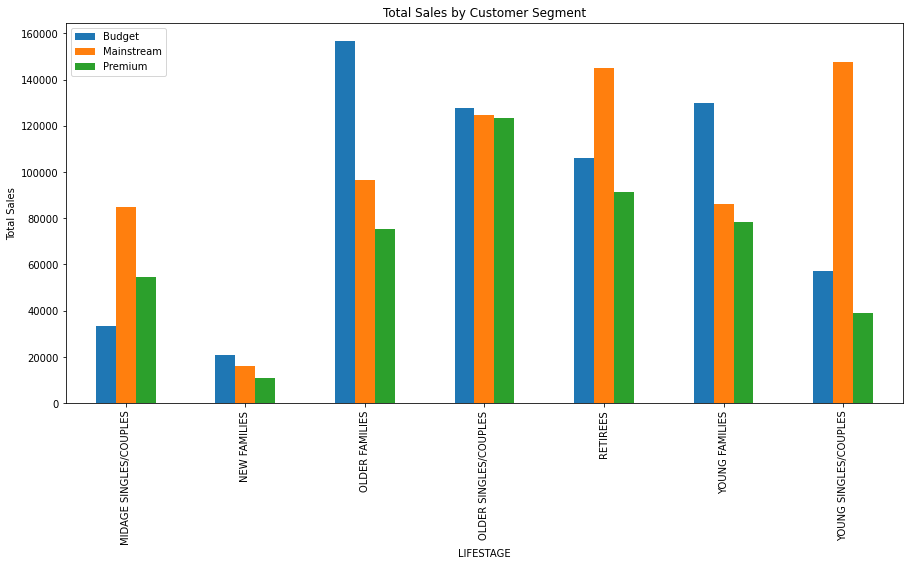

In [94]:
table.unstack().plot(kind = 'bar', figsize = (15, 7), title = 'Total Sales by Customer Segment')
plt.ylabel('Total Sales')
plt.legend(['Budget', 'Mainstream', 'Premium'])

In [95]:
table_1 = pd.DataFrame(df.groupby([ 'LIFESTAGE','PREMIUM_CUSTOMER']).LYLTY_CARD_NBR.nunique())

In [96]:
table_1

LYLTY_CARD_NBR
LIFESTAGE              PREMIUM_CUSTOMER                
MIDAGE SINGLES/COUPLES Budget                      1474
                       Mainstream                  3298
                       Premium                     2369
NEW FAMILIES           Budget                      1087
                       Mainstream                   830
                       Premium                      575
OLDER FAMILIES         Budget                      4611
                       Mainstream                  2788
                       Premium                     2231
OLDER SINGLES/COUPLES  Budget                      4849
                       Mainstream                  4858
                       Premium                     4682
RETIREES               Budget                      4385
                       Mainstream                  6358
                       Premium                     3812
YOUNG FAMILIES         Budget                      3953
                       Mainstream                  2685
                       Premium                     2398
YOUNG SINGLES/COUPLES  Budget                      3647
                       Mainstream                  7917
                       Premium                     2480

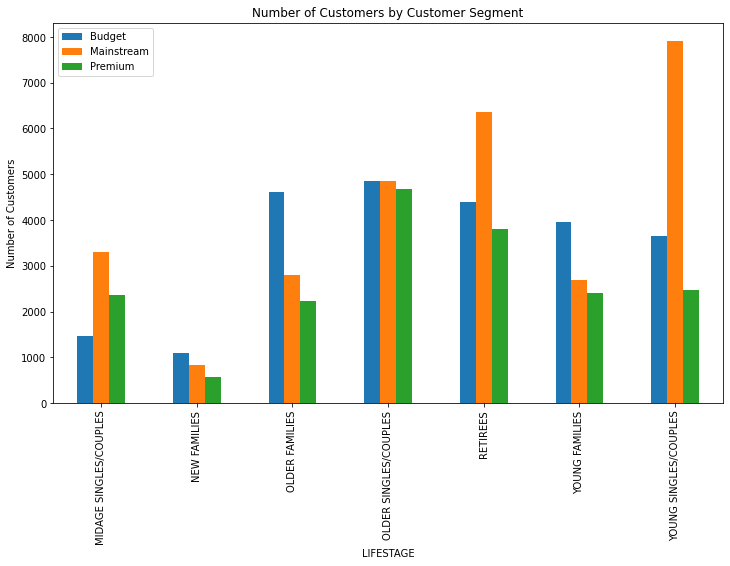

In [97]:
table_1.unstack().plot(kind = 'bar',  figsize = (12, 7), title = 'Number of Customers by Customer Segment')
plt.ylabel('Number of Customers')
plt.legend(['Budget', 'Mainstream', 'Premium'], loc = 2)

In [99]:
prod_sum = df.groupby([ 'LIFESTAGE','PREMIUM_CUSTOMER']).PROD_QTY.sum() 
number_cust= df.groupby(['LIFESTAGE','PREMIUM_CUSTOMER']).LYLTY_CARD_NBR.nunique()


In [101]:
prod_sum=pd.DataFrame(prod_sum)
number_cust=pd.DataFrame(number_cust)

In [102]:
prod_sum.columns

Index(['PROD_QTY'], dtype='object')

In [103]:
prod_sum.head()

PROD_QTY
LIFESTAGE              PREMIUM_CUSTOMER          
MIDAGE SINGLES/COUPLES Budget                8883
                       Mainstream           21213
                       Premium              14400
NEW FAMILIES           Budget                5241
                       Mainstream            4060

In [104]:
number_cust.head()

LYLTY_CARD_NBR
LIFESTAGE              PREMIUM_CUSTOMER                
MIDAGE SINGLES/COUPLES Budget                      1474
                       Mainstream                  3298
                       Premium                     2369
NEW FAMILIES           Budget                      1087
                       Mainstream                   830

In [117]:
table_2=prod_sum['PROD_QTY']/number_cust['LYLTY_CARD_NBR']

In [ ]:
table_2=pd.DataFrame(table_2)

In [122]:
table_2.rename(columns={0: "avg_unit"})

avg_unit
LIFESTAGE              PREMIUM_CUSTOMER          
MIDAGE SINGLES/COUPLES Budget            6.026459
                       Mainstream        6.432080
                       Premium           6.078514
NEW FAMILIES           Budget            4.821527
                       Mainstream        4.891566
                       Premium           4.815652
OLDER FAMILIES         Budget            9.076773
                       Mainstream        9.255380
                       Premium           9.071717
OLDER SINGLES/COUPLES  Budget            6.781398
                       Mainstream        6.712021
                       Premium           6.769543
RETIREES               Budget            6.141847
                       Mainstream        5.925920
                       Premium           6.103358
YOUNG FAMILIES         Budget            8.722995
                       Mainstream        8.638361
                       Premium           8.716013
YOUNG SINGLES/COUPLES  Budget            4.250069
                       Mainstream        4.575597
                       Premium           4.264113

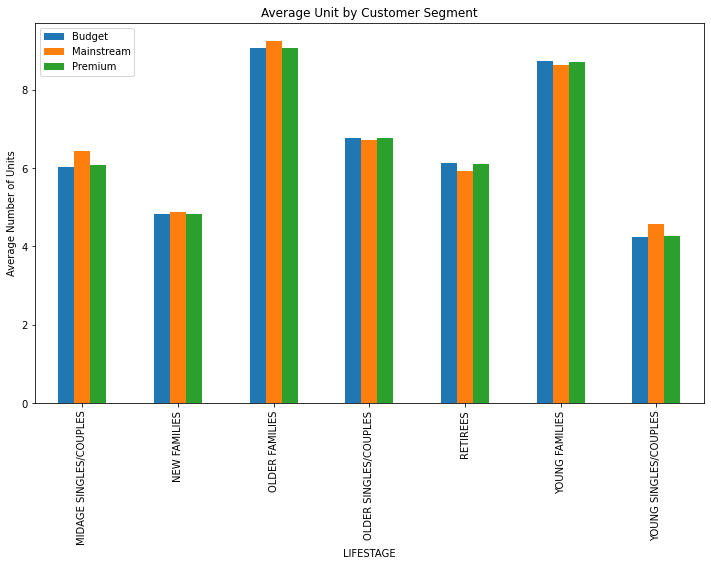

In [124]:
table_2.unstack().plot(kind = 'bar',  figsize = (12, 7), title = 'Average Unit by Customer Segment')
plt.ylabel('Average Number of Units')
plt.legend(['Budget', 'Mainstream', 'Premium'], loc = 2)

In [129]:
avg_price = df.groupby(['LIFESTAGE','PREMIUM_CUSTOMER']).TOT_SALES.sum() / df.groupby(['LIFESTAGE','PREMIUM_CUSTOMER']).PROD_QTY.sum()
avg_price = pd.DataFrame(avg_price, columns = {'Price per Unit'})


In [132]:
avg_price.sort_values(by = 'Price per Unit', ascending = False).head()

,,Price per Unit
LIFESTAGE,PREMIUM_CUSTOMER,
YOUNG SINGLES/COUPLES,Mainstream,4.074043
MIDAGE SINGLES/COUPLES,Mainstream,3.994449
NEW FAMILIES,Mainstream,3.935887
RETIREES,Budget,3.932731
NEW FAMILIES,Budget,3.931969


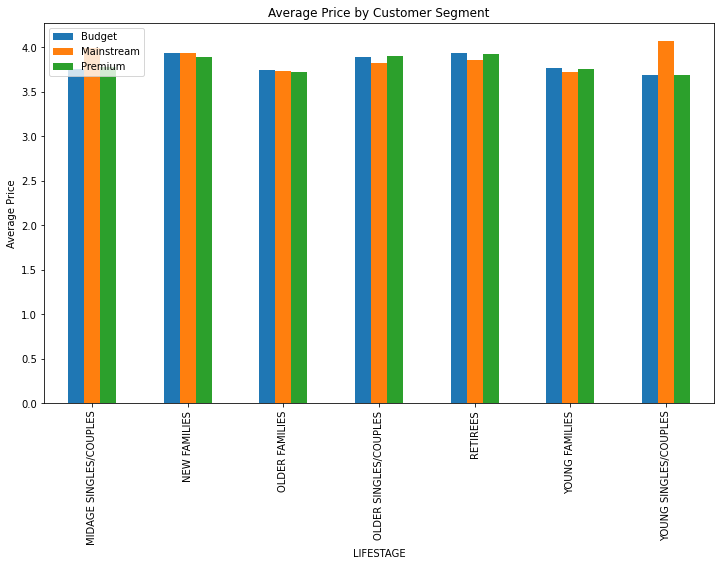

In [131]:
avg_price.unstack().plot(kind = 'bar', figsize = (12, 7), title = 'Average Price by Customer Segment')
plt.ylabel('Average Price')
plt.legend(['Budget', 'Mainstream', 'Premium'], loc = 2)

In [134]:
pricePerUnit = df
# Create a new column under pricePerUnit called PRICE
pricePerUnit['PRICE'] = pricePerUnit['TOT_SALES'] / pricePerUnit['PROD_QTY']
pricePerUnit.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,quantity,brand,LIFESTAGE,PREMIUM_CUSTOMER,PRICE
0,2018-10-17,1,1000,1,5,natural chip compny seasalt175g,2,6.0,175,NCC,YOUNG SINGLES/COUPLES,Premium,3.00
1,2019-05-14,1,1307,348,66,ccs nacho cheese 175g,3,6.3,175,CCs,MIDAGE SINGLES/COUPLES,Budget,2.10
2,2018-11-10,1,1307,346,96,ww original stacked chips 160g,2,3.8,160,Woolworths,MIDAGE SINGLES/COUPLES,Budget,1.90
3,2019-03-09,1,1307,347,54,ccs original 175g,1,2.1,175,CCs,MIDAGE SINGLES/COUPLES,Budget,2.10
4,2019-05-20,1,1343,383,61,smiths crinkle cut chips chicken 170g,2,2.9,170,Smiths,MIDAGE SINGLES/COUPLES,Budget,1.45


In [135]:
mainstream = pricePerUnit.loc[(pricePerUnit['PREMIUM_CUSTOMER'] == 'Mainstream') & ( (pricePerUnit['LIFESTAGE'] == 'YOUNG SINGLES/COUPLES') | (pricePerUnit['LIFESTAGE'] == 'MIDAGE SINGLES/COUPLES') ), 'PRICE']
nonMainstream = pricePerUnit.loc[(pricePerUnit['PREMIUM_CUSTOMER'] != 'Mainstream') & ( (pricePerUnit['LIFESTAGE'] == 'YOUNG SINGLES/COUPLES') | (pricePerUnit['LIFESTAGE'] == 'MIDAGE SINGLES/COUPLES') ), 'PRICE']

Text(0.5, 0, 'Price per Unit')

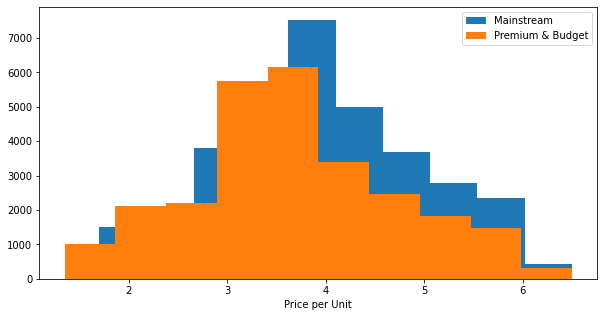

In [136]:
plt.figure(figsize = (10, 5))
plt.hist(mainstream, label = 'Mainstream')
plt.hist(nonMainstream, label = 'Premium & Budget')
plt.legend()
plt.xlabel('Price per Unit')

In [139]:
np.mean(mainstream)


4.039785893795489

In [138]:
np.mean(nonMainstream)

3.706491319964082

In [141]:
from scipy.stats import ttest_ind

In [142]:
ttest_ind(mainstream, nonMainstream)

Ttest_indResult(statistic=37.83196107667825, pvalue=2.235645611540966e-309)

In [161]:
target_1 = df.loc[(df['LIFESTAGE'] == 'YOUNG SINGLES/COUPLES') & (df['PREMIUM_CUSTOMER'] == 'Mainstream'), :]
nonTarget_1 = df.loc[(df['LIFESTAGE'] != 'YOUNG SINGLES/COUPLES' ) & (df['PREMIUM_CUSTOMER'] != 'Mainstream'), :]
target_1.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,quantity,brand,LIFESTAGE,PREMIUM_CUSTOMER,PRICE
221345,2018-08-16,1,1020,26,19,smiths crinkle cut snag&sauce 150g,1,2.6,150,Smiths,YOUNG SINGLES/COUPLES,Mainstream,2.6
221346,2018-10-02,1,1020,27,7,smiths crinkle original 330g,1,5.7,330,Smiths,YOUNG SINGLES/COUPLES,Mainstream,5.7
221347,2019-05-02,1,1020,28,84,grnwves plus btroot & chilli jam 180g,1,3.1,180,Grain Waves,YOUNG SINGLES/COUPLES,Mainstream,3.1
221348,2018-08-17,1,1163,188,46,kettle original 175g,1,5.4,175,Kettle,YOUNG SINGLES/COUPLES,Mainstream,5.4
221349,2019-02-07,1,1163,189,12,natural chip co tmato hrb&spce 175g,1,3.0,175,NCC,YOUNG SINGLES/COUPLES,Mainstream,3.0


In [165]:
# Target Segment
targetBrand_1 = target_1.loc[:, ['brand', 'PROD_QTY']]
targetSum_1 = targetBrand_1['PROD_QTY'].sum()
targetBrand_1['Target Brand Affinity'] = targetBrand_1['PROD_QTY'] / targetSum_1
targetBrand_1 = pd.DataFrame(targetBrand_1.groupby('brand')['Target Brand Affinity'].sum())

# Non-target segment
nonTargetBrand_1 = nonTarget_1.loc[:, ['brand', 'PROD_QTY']]
nonTargetSum_1 = nonTargetBrand_1['PROD_QTY'].sum()
nonTargetBrand_1['Non-Target Brand Affinity'] = nonTargetBrand_1['PROD_QTY'] / nonTargetSum_1
nonTargetBrand_1 = pd.DataFrame(nonTargetBrand_1.groupby('brand')['Non-Target Brand Affinity'].sum())

In [167]:
brand_proportions = pd.merge(targetBrand_1, nonTargetBrand_1, left_index = True, right_index = True)
brand_proportions.head()

,Target Brand Affinity,Non-Target Brand Affinity
brand,,
Burger,0.002926,0.006538
CCs,0.011180,0.018445
Cheetos,0.008033,0.011759
Cheezels,0.017971,0.018904
Cobs,0.044638,0.038449


In [168]:
brand_proportions['Affinity to Brand'] = brand_proportions['Target Brand Affinity'] / brand_proportions['Non-Target Brand Affinity']
brand_proportions.sort_values(by = 'Affinity to Brand', ascending = False)

,Target Brand Affinity,Non-Target Brand Affinity,Affinity to Brand
brand,,,
Tyrrells,0.031553,0.025715,1.227025
Twisties,0.046184,0.037933,1.217506
Doritos,0.122761,0.101171,1.213397
Kettle,0.197985,0.166560,1.188667
Tostitos,0.045411,0.038350,1.184100
Pringles,0.119420,0.101110,1.181090
Cobs,0.044638,0.038449,1.160959
Infuzions,0.064679,0.057410,1.126622
Thins,0.060373,0.057159,1.056217


In [169]:
target_2 = df.loc[(df['LIFESTAGE'] == 'OLDER FAMILIES') & (df['PREMIUM_CUSTOMER'] == 'Budget'), :]
nonTarget_2 = df.loc[(df['LIFESTAGE'] != 'OLDER FAMILIES' ) & (df['PREMIUM_CUSTOMER'] != 'Budget'), :]
target_2.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,quantity,brand,LIFESTAGE,PREMIUM_CUSTOMER,PRICE
29896,2018-07-21,77,2330461,236777,87,infuzions bbq rib prawn crackers 110g,1,3.8,110,Infuzions,OLDER FAMILIES,Budget,3.8
29897,2019-05-20,1,1367,424,7,smiths crinkle original 330g,1,5.7,330,Smiths,OLDER FAMILIES,Budget,5.7
29898,2019-04-21,1,1367,422,82,smith crinkle cut mac n cheese 150g,1,2.6,150,Smiths,OLDER FAMILIES,Budget,2.6
29899,2019-04-24,1,1367,423,51,doritos mexicana 170g,2,8.8,170,Doritos,OLDER FAMILIES,Budget,4.4
29900,2018-08-17,3,3088,1462,89,kettle sweet chilli and sour cream 175g,2,10.8,175,Kettle,OLDER FAMILIES,Budget,5.4


In [170]:
targetBrand_2 = target_2.loc[:, ['brand', 'PROD_QTY']]
targetSum_2 = targetBrand_2['PROD_QTY'].sum()
targetBrand_2['Target Brand Affinity'] = targetBrand_2['PROD_QTY'] / targetSum_2
targetBrand_2 = pd.DataFrame(targetBrand_2.groupby('brand')['Target Brand Affinity'].sum())

nonTargetBrand_2 = nonTarget_2.loc[:, ['brand', 'PROD_QTY']]
nonTargetSum_2 = nonTargetBrand_2['PROD_QTY'].sum()
nonTargetBrand_2['Non-Target Brand Affinity'] = nonTargetBrand_2['PROD_QTY'] / nonTargetSum_2
nonTargetBrand_2 = pd.DataFrame(nonTargetBrand_2.groupby('brand')['Non-Target Brand Affinity'].sum())

In [171]:
brand_proportions_2 = pd.merge(targetBrand_2, nonTargetBrand_2, left_index = True, right_index = True)
brand_proportions_2.head()

,Target Brand Affinity,Non-Target Brand Affinity
brand,,
Burger,0.007192,0.005766
CCs,0.021074,0.017391
Cheetos,0.013093,0.011145
Cheezels,0.020118,0.018953
Cobs,0.035577,0.041136


In [172]:
brand_proportions_2['Affinity to Brand'] = brand_proportions_2['Target Brand Affinity'] / brand_proportions_2['Non-Target Brand Affinity']
brand_proportions_2.sort_values(by = 'Affinity to Brand', ascending = False)

,Target Brand Affinity,Non-Target Brand Affinity,Affinity to Brand
brand,,,
Woolworths,0.056268,0.043394,1.296675
Red Rock Deli,0.079182,0.061404,1.289521
French,0.006595,0.005263,1.252918
Sunbites,0.014097,0.011285,1.249219
Burger,0.007192,0.005766,1.247270
NCC,0.034430,0.027879,1.234982
CCs,0.021074,0.017391,1.211762
Cheetos,0.013093,0.011145,1.174785
Smiths,0.136597,0.117711,1.160443


In [189]:
targetSize = target_1.loc[:, ['quantity', 'PROD_QTY']]
targetSum = targetSize['PROD_QTY'].sum()
targetSize['Target Pack Affinity'] = targetSize['PROD_QTY'] / targetSum
targetSize = pd.DataFrame(targetSize.groupby('quantity')['Target Pack Affinity'].sum())

# Non-target segment
nonTargetSize = nonTarget_1.loc[:, ['quantity', 'PROD_QTY']]
nonTargetSum = nonTargetSize['PROD_QTY'].sum()
nonTargetSize['Non-Target Pack Affinity'] = nonTargetSize['PROD_QTY'] / nonTargetSum
nonTargetSize = pd.DataFrame(nonTargetSize.groupby('quantity')['Non-Target Pack Affinity'].sum())

In [190]:
pack_proportions = pd.merge(targetSize, nonTargetSize, left_index = True, right_index = True)
pack_proportions.head()

,Target Pack Affinity,Non-Target Pack Affinity
quantity,,
70,0.003037,0.006284
90,0.006349,0.012613
110,0.106280,0.089575
125,0.003009,0.005976
134,0.119420,0.101110


In [192]:
pack_proportions['Affinity to Pack'] = pack_proportions['Target Pack Affinity'] / pack_proportions['Non-Target Pack Affinity']
pack_proportions.sort_values(by = 'Affinity to Pack', ascending = False)

,Target Pack Affinity,Non-Target Pack Affinity,Affinity to Pack
quantity,,,
270,0.031829,0.025070,1.269608
380,0.032160,0.025711,1.250827
330,0.061284,0.050974,1.202243
110,0.106280,0.089575,1.186492
134,0.119420,0.101110,1.181090
210,0.029124,0.024891,1.170020
135,0.014769,0.012931,1.142086
250,0.014355,0.012863,1.115959
170,0.080773,0.080347,1.005300


In [193]:
df.loc[df['quantity'] == 270, :].head(10)

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,quantity,brand,LIFESTAGE,PREMIUM_CUSTOMER,PRICE
34,2019-05-18,9,9208,8634,15,twisties cheese 270g,2,9.2,270,Twisties,MIDAGE SINGLES/COUPLES,Budget,4.6
79,2018-08-24,39,39167,35639,113,twisties chicken270g,2,9.2,270,Twisties,MIDAGE SINGLES/COUPLES,Budget,4.6
125,2019-05-06,54,54305,48304,15,twisties cheese 270g,2,9.2,270,Twisties,MIDAGE SINGLES/COUPLES,Budget,4.6
132,2019-05-20,55,55073,48887,113,twisties chicken270g,1,4.6,270,Twisties,MIDAGE SINGLES/COUPLES,Budget,4.6
209,2019-01-01,80,80182,78980,15,twisties cheese 270g,2,9.2,270,Twisties,MIDAGE SINGLES/COUPLES,Budget,4.6
252,2018-11-18,84,84096,83672,113,twisties chicken270g,2,9.2,270,Twisties,MIDAGE SINGLES/COUPLES,Budget,4.6
253,2019-05-20,88,88320,87811,113,twisties chicken270g,2,9.2,270,Twisties,MIDAGE SINGLES/COUPLES,Budget,4.6
278,2018-07-11,102,102115,102207,15,twisties cheese 270g,2,9.2,270,Twisties,MIDAGE SINGLES/COUPLES,Budget,4.6
347,2019-04-05,118,118007,120735,113,twisties chicken270g,2,9.2,270,Twisties,MIDAGE SINGLES/COUPLES,Budget,4.6
350,2018-07-01,119,119051,122360,113,twisties chicken270g,2,9.2,270,Twisties,MIDAGE SINGLES/COUPLES,Budget,4.6


In [195]:
df.loc[df['quantity'] == 270, 'brand'].unique()

array(['Twisties'], dtype=object)

In [196]:
targetSize = target_2.loc[:, ['quantity', 'PROD_QTY']]
targetSum = targetSize['PROD_QTY'].sum()
targetSize['Target Pack Affinity'] = targetSize['PROD_QTY'] / targetSum
targetSize = pd.DataFrame(targetSize.groupby('quantity')['Target Pack Affinity'].sum())

# Non-target segment
nonTargetSize = nonTarget_2.loc[:, ['quantity', 'PROD_QTY']]
nonTargetSum = nonTargetSize['PROD_QTY'].sum()
nonTargetSize['Non-Target Pack Affinity'] = nonTargetSize['PROD_QTY'] / nonTargetSum
nonTargetSize = pd.DataFrame(nonTargetSize.groupby('quantity')['Non-Target Pack Affinity'].sum())

In [197]:
pack_proportions = pd.merge(targetSize, nonTargetSize, left_index = True, right_index = True)
pack_proportions.head()

,Target Pack Affinity,Non-Target Pack Affinity
quantity,,
70,0.006595,0.005666
90,0.014097,0.011285
110,0.084008,0.094129
125,0.007144,0.005553
134,0.092347,0.104713


In [198]:
pack_proportions['Affinity to Pack'] = pack_proportions['Target Pack Affinity'] / pack_proportions['Non-Target Pack Affinity']
pack_proportions.sort_values(by = 'Affinity to Pack', ascending = False)

,Target Pack Affinity,Non-Target Pack Affinity,Affinity to Pack
quantity,,,
180,0.007670,0.005391,1.422702
125,0.007144,0.005553,1.286437
160,0.014193,0.011033,1.286342
190,0.014455,0.011285,1.280978
200,0.020620,0.016331,1.262587
90,0.014097,0.011285,1.249219
220,0.007192,0.005766,1.247270
70,0.006595,0.005666,1.163974
165,0.062911,0.060008,1.048371


In [200]:
df.loc[df['quantity'] == 180, :].head(10)

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,quantity,brand,LIFESTAGE,PREMIUM_CUSTOMER,PRICE
17,2018-09-09,5,5026,4526,84,grnwves plus btroot & chilli jam 180g,2,6.2,180,Grain Waves,MIDAGE SINGLES/COUPLES,Budget,3.1
110,2018-12-06,43,43227,40185,84,grnwves plus btroot & chilli jam 180g,2,6.2,180,Grain Waves,MIDAGE SINGLES/COUPLES,Budget,3.1
172,2019-02-08,71,71122,69715,84,grnwves plus btroot & chilli jam 180g,2,6.2,180,Grain Waves,MIDAGE SINGLES/COUPLES,Budget,3.1
189,2019-05-16,74,74336,73182,84,grnwves plus btroot & chilli jam 180g,5,15.5,180,Grain Waves,MIDAGE SINGLES/COUPLES,Budget,3.1
848,2018-07-09,5,5028,4534,84,grnwves plus btroot & chilli jam 180g,2,6.2,180,Grain Waves,MIDAGE SINGLES/COUPLES,Budget,3.1
919,2019-03-07,9,9140,8536,84,grnwves plus btroot & chilli jam 180g,2,6.2,180,Grain Waves,MIDAGE SINGLES/COUPLES,Budget,3.1
1078,2018-11-11,24,24139,21077,84,grnwves plus btroot & chilli jam 180g,2,6.2,180,Grain Waves,MIDAGE SINGLES/COUPLES,Budget,3.1
1264,2018-07-13,39,39144,35499,84,grnwves plus btroot & chilli jam 180g,2,6.2,180,Grain Waves,MIDAGE SINGLES/COUPLES,Budget,3.1
1291,2019-01-16,41,41320,38270,84,grnwves plus btroot & chilli jam 180g,2,6.2,180,Grain Waves,MIDAGE SINGLES/COUPLES,Budget,3.1
1333,2019-01-01,45,45187,41480,84,grnwves plus btroot & chilli jam 180g,2,6.2,180,Grain Waves,MIDAGE SINGLES/COUPLES,Budget,3.1


In [201]:
df.loc[df['quantity'] == 180, 'brand'].unique()

array(['Grain Waves'], dtype=object)

#conclusions

1. there was no sales on christmas day ie. 25 dec 2018
2. older families of budget type have highest tootal sales sum.
3. following older family budget is young single/couples and then retirees of mainstream.
4. the population of young single/couples of mainstream is highest.
5. the mainstream young single/couples are paying more price per packet compared to budget and premium counterparts.
6. young singles/couples of mainstream have more affinity to brand tyrrells 
7. older families have affinity to woolsworth
8. pack affinity for mainstrem young singles/couples is 270g
9. only twisties makes 270 gm packets.
10. older familes have affinity to pack size 180gm 
11. only grain waves makes 180 gm packets